In [1]:
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")

In [4]:
app_train["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)

In [5]:
n_heads = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
md_heads = ['CNT_CHILDREN', "CNT_FAM_MEMBERS","HOUR_APPR_PROCESS_START", "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
ms_heads = [head for head in m_heads if head not in md_heads]

In [6]:
payback = app_train[app_train["TARGET"] == "Payback"]
default = app_train[app_train["TARGET"] == "Default"]
m = app_train[m_heads]
n = app_train[n_heads]

md = m[md_heads]
mdp = md[app_train["TARGET"] == "Payback"]
mdd = md[app_train["TARGET"] == "Default"]

ms = m[ms_heads]
msp = ms[app_train["TARGET"] == "Payback"]
msd = ms[app_train["TARGET"] == "Default"]

In [7]:
# Test Datenbereinigung
# Verbesserung der Prognosegenauigkeit von 0.7465 auf 0.7501
mode = [head for head in m_heads if "MODE" in head]
medi = [head for head in m_heads if "MEDI" in head]
app_train = app_train.drop(mode + medi, axis=1)

andere = ["REGION_RATING_CLIENT_W_CITY", "LIVE_REGION_NOT_WORK_REGION"]
for head in andere:
    n_heads.remove(head)
app_train = app_train.drop(andere, axis=1)

In [8]:
# transformiert kategorische variablen in integer
for head in n_heads:
    app_train[head], cats = pd.factorize(app_train[head])

In [108]:
y = app_train["TARGET"]
x = app_train.drop(["SK_ID_CURR", "TARGET"], axis=1)

In [129]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

In [130]:
# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

In [131]:
model = RandomForestClassifier(max_depth=7, random_state=0)
#model = RandomForestClassifier(max_depth=20, random_state=0)

In [132]:
model.fit(x,y)

RandomForestClassifier(max_depth=7, random_state=0)

In [133]:
# Prognosewerte der Testdaten
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [134]:
# Prognosewerte der Testdaten in %
x_test_prob = model.predict_proba(x_test)
x_test_prob

array([[0.12822749, 0.87177251],
       [0.03840502, 0.96159498],
       [0.06904182, 0.93095818],
       ...,
       [0.07832388, 0.92167612],
       [0.06588223, 0.93411777],
       [0.08699681, 0.91300319]])

In [135]:
# Durchschnittliche Trefferwahrscheinlichkeit
model.score(x_test, y_test)

0.919424282629621

In [136]:
# Erstellung der AUC & ROC-Metrik
# Wahrscheinlichkeiten für keinen Kreditausfall
prob = x_test_prob[:,1]
auc = roc_auc_score(y_test, prob)
print(auc)
# FalsePositiveRate, TruePositiveRate & Treshold
fpr, tpr, threshold = roc_curve(y_test, prob)

0.7503918244890717


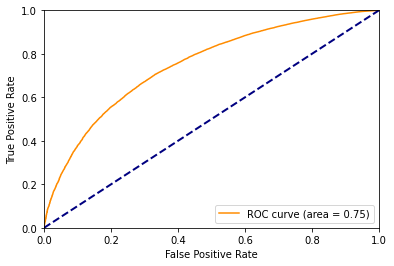

In [137]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [138]:
# Koeffizienten der einzelnen Klassen
coef_dict = {}
for coef, feat in zip(model.feature_importances_, x.columns.values):
    coef_dict[feat] = coef

In [139]:
# Feature Importance
d = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True))

for i,v in d.items():
    print('Feature: {}, Score: {}'.format(i,v))

Feature: EXT_SOURCE_2, Score: 0.26142952445518836
Feature: EXT_SOURCE_3, Score: 0.21777671323975312
Feature: EXT_SOURCE_1, Score: 0.08283488657779463
Feature: DAYS_BIRTH, Score: 0.05096478185438149
Feature: DAYS_EMPLOYED, Score: 0.043358216757112024
Feature: AMT_GOODS_PRICE, Score: 0.030371351325380894
Feature: NAME_INCOME_TYPE, Score: 0.026699656165499557
Feature: DAYS_LAST_PHONE_CHANGE, Score: 0.023415679908205634
Feature: CODE_GENDER, Score: 0.01982776135292547
Feature: NAME_EDUCATION_TYPE, Score: 0.017868843863035017
Feature: AMT_CREDIT, Score: 0.01684516107923473
Feature: DAYS_ID_PUBLISH, Score: 0.016685573962091117
Feature: REGION_RATING_CLIENT, Score: 0.015634957649754724
Feature: AMT_ANNUITY, Score: 0.012027312128102145
Feature: FLAG_DOCUMENT_3, Score: 0.011998904213380162
Feature: LIVINGAREA_AVG, Score: 0.011382726964133073
Feature: REG_CITY_NOT_WORK_CITY, Score: 0.01085289365081936
Feature: DAYS_REGISTRATION, Score: 0.009348871298271673
Feature: FLAG_EMP_PHONE, Score: 0.00909

<ipython-input-140-10bac31632bc>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(tuple(t.index))


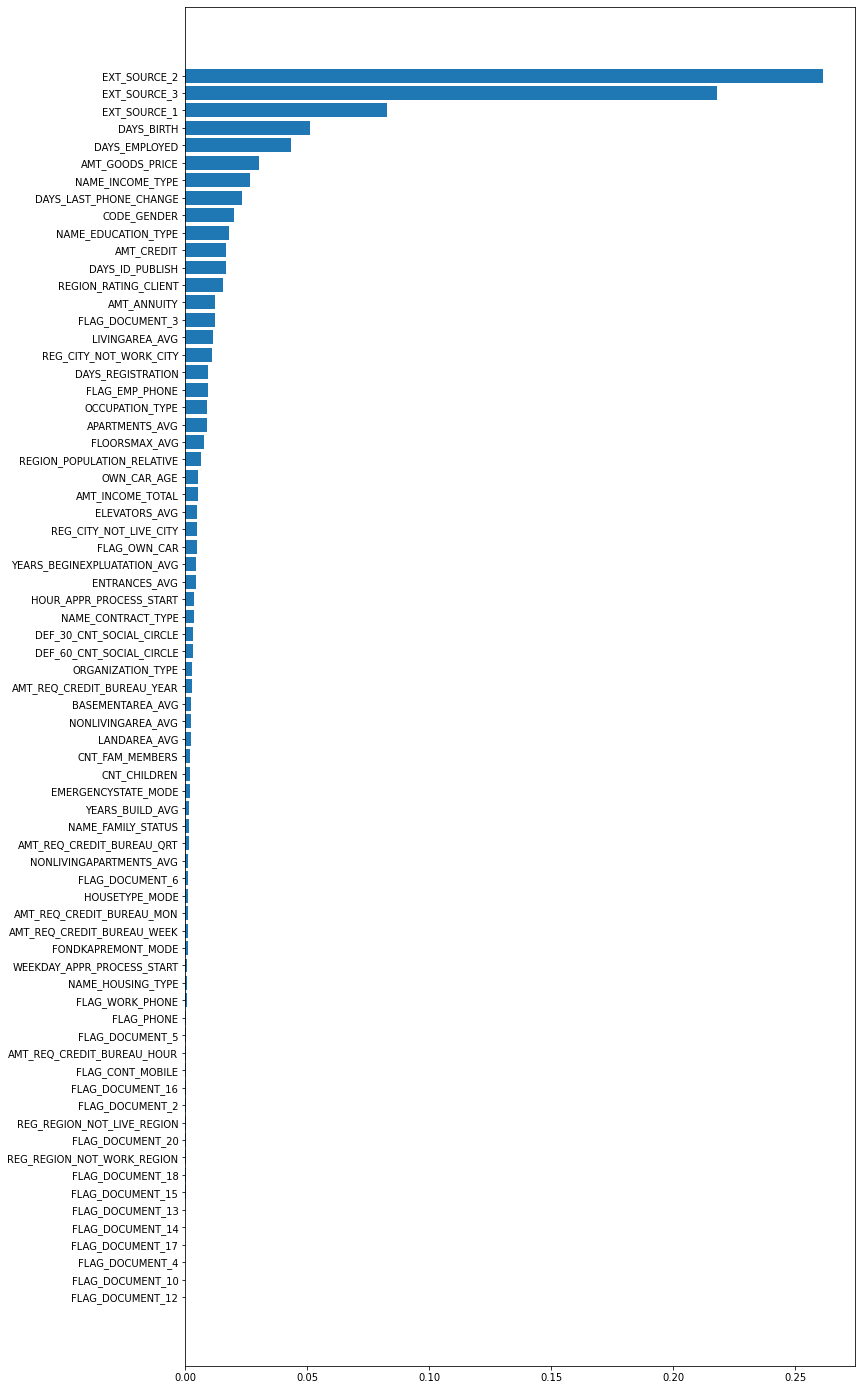

In [140]:
# Feature Importance: Top10 und Bottom10 visualisiert
t = pd.DataFrame.from_dict(d,orient="index",columns=["importance"])
t = t.sort_values(by="importance")
t = np.squeeze(t)

fig, ax = plt.subplots(figsize=(12,25))
ax.barh(t.index, t.values)
ax.set_yticklabels(tuple(t.index))
plt.show()

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# model = Ridge()
# # define model evaluation method

# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # define grid
# grid = dict()
# grid['alpha'] = np.arange(0, 1, 0.01)
# # define search
# search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # perform the search
# results = search.fit(x, y)
# # summarize
# print('MAE: %.3f' % results.best_score_)
# print('Config: %s' % results.best_params_)

In [29]:
x[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]].head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
1,0.311267,0.622246,0.000000
2,0.000000,0.555912,0.729567
3,0.000000,0.650442,0.000000
4,0.000000,0.322738,0.000000


In [119]:
def ridge_auc(x):
    x = x.fillna(0)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)
    #normalisiert, da manche variablen sehr stark auseindergehende werte haben und damit eine warnung verursachen
    model = Ridge(alpha=0,normalize=True)
    model.fit(x,y)
    auc = roc_auc_score(y_test, model.predict(x_test))
    return auc

In [120]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

In [121]:
# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

In [122]:
model = Ridge(alpha=0)
model.fit(x,y)

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.76562e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0)

In [123]:
# Prognosewerte der Testdaten
model.predict(x_test)

array([0.85668772, 0.95592869, 0.93777163, ..., 0.91020028, 0.93139403,
       0.87435784])

In [124]:
# Prognosewerte der Testdaten in %
x_test_prob = model.predict(x_test)
x_test_prob

array([0.85668772, 0.95592869, 0.93777163, ..., 0.91020028, 0.93139403,
       0.87435784])

In [125]:
# Erstellung der AUC & ROC-Metrik
# Wahrscheinlichkeiten für keinen Kreditausfall
prob = x_test_prob
auc = roc_auc_score(y_test, prob)
print(auc)

0.730499729432085


In [126]:
features = list(reversed(t.index))
drop = []
v = features[:3]
x_ = x[v]
auc = ridge_auc(x_)
features = features[3:]
for feature in features:
    v.append(feature)
    x_ = x[v]
    auc_ = ridge_auc(x_)
    diff = auc_ - auc
    print(diff, feature)
    auc = auc_
    if diff < 0:
        drop.append(feature)

0.006549666695750744 DAYS_BIRTH
0.0006950228073607789 DAYS_EMPLOYED
0.0004419629282841342 DAYS_LAST_PHONE_CHANGE
0.00024730446946952256 AMT_GOODS_PRICE
0.001434133879425148 NAME_INCOME_TYPE
0.0023669110589256137 CODE_GENDER
0.0020033650155633076 NAME_EDUCATION_TYPE
0.0008241712298808768 DAYS_ID_PUBLISH
0.0050493693012320096 AMT_CREDIT
2.9060250729906478e-05 REGION_RATING_CLIENT
0.0017226346344654253 FLAG_DOCUMENT_3
0.0005327379566123502 REG_CITY_NOT_WORK_CITY
0.00046836529888305556 LIVINGAREA_AVG
0.0015765711316272357 FLAG_EMP_PHONE
1.6502837685505867e-05 REGION_POPULATION_RELATIVE
1.2499173780433637e-05 APARTMENTS_AVG
0.0010102331165684486 AMT_ANNUITY
0.0003253068278661342 DAYS_REGISTRATION
0.0003159371580596648 FLOORSMAX_AVG
2.6412077142934365e-05 OCCUPATION_TYPE
0.001709688959661948 FLAG_OWN_CAR
0.0003128870193573885 OWN_CAR_AGE
0.00026636640892663266 REG_CITY_NOT_LIVE_CITY
0.0002702770042046776 NAME_CONTRACT_TYPE
9.599201022947312e-06 YEARS_BEGINEXPLUATATION_AVG
6.0694448533737955e

In [127]:
features = list(reversed(t.index))
test = [feature for feature in features if feature not in drop]
drop

['LIVINGAPARTMENTS_AVG',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'WALLSMATERIAL_MODE',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_TYPE_SUITE',
 'FLAG_DOCUMENT_8',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'FLAG_OWN_REALTY',
 'FLAG_DOCUMENT_19',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_11',
 'FLAG_MOBIL']

In [128]:
features = list(reversed(t.index))
x = x[test]
auc = ridge_auc(x_)
auc

0.730499729432085